In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset glass.xlsx
df=pd.read_excel("glass.xlsx", sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
# Check missing values per column
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [8]:
df.sample(30) # random sample

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
28,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10,2
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
12,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
173,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7


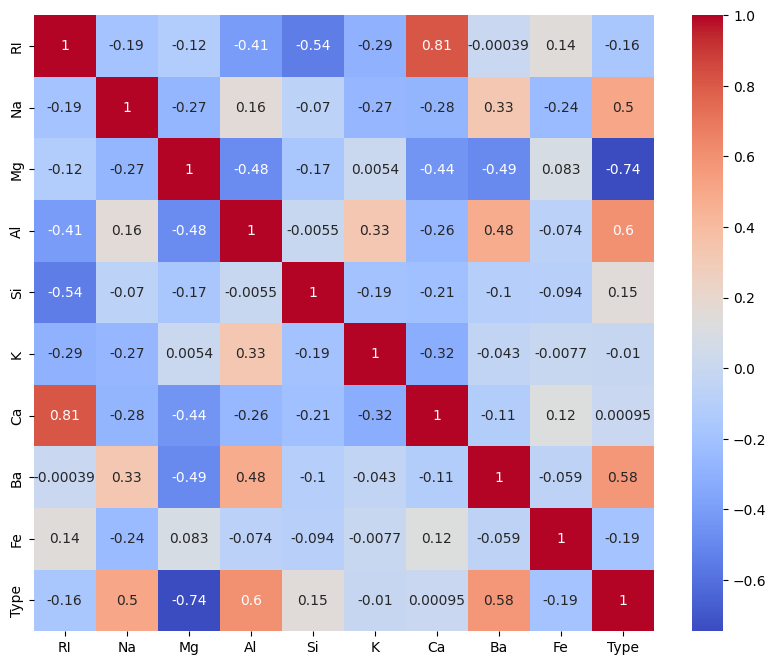

In [11]:
# Heatmap: visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

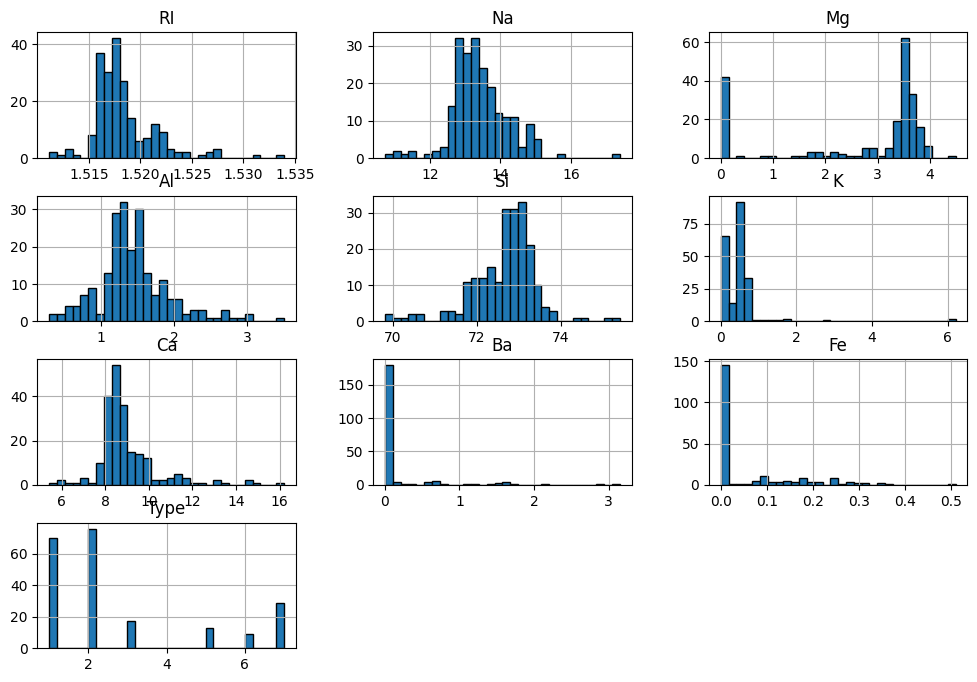

In [12]:
# Histogram plot for numerical columns
df.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()

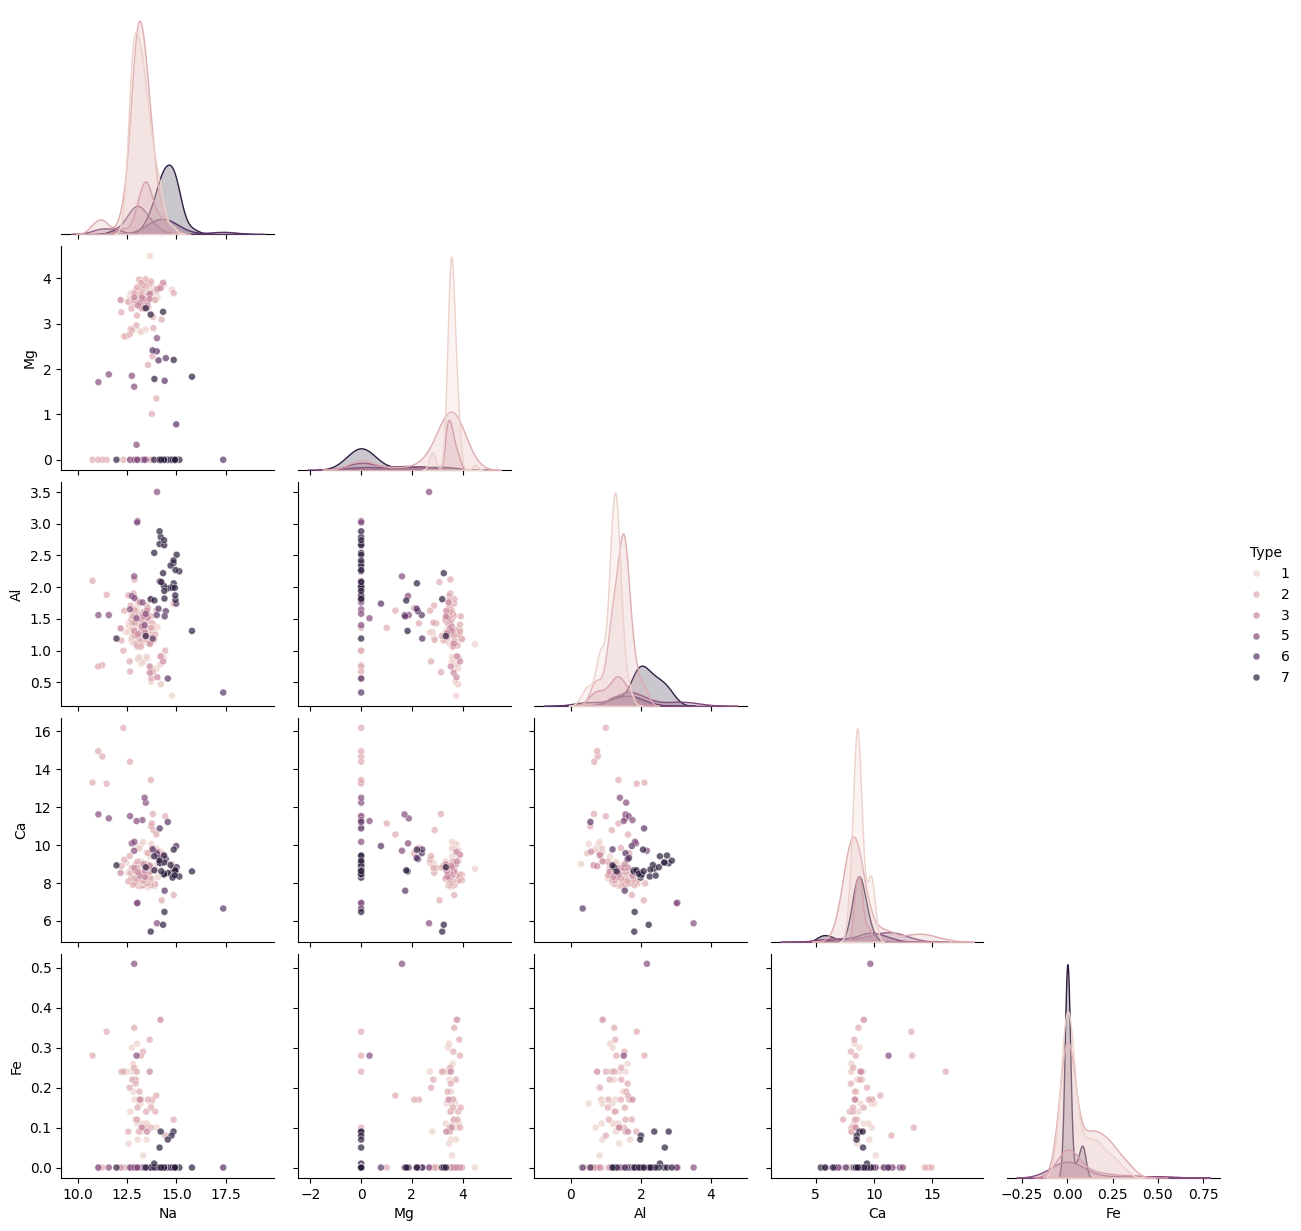

In [17]:
sns.pairplot(
    df,
    vars=["Na", "Mg", "Al", "Ca", "Fe"],  # key numerical features
    hue="Type",
    corner=True,  # only lower triangle
    plot_kws={"s": 25, "alpha": 0.7}
)
plt.show()


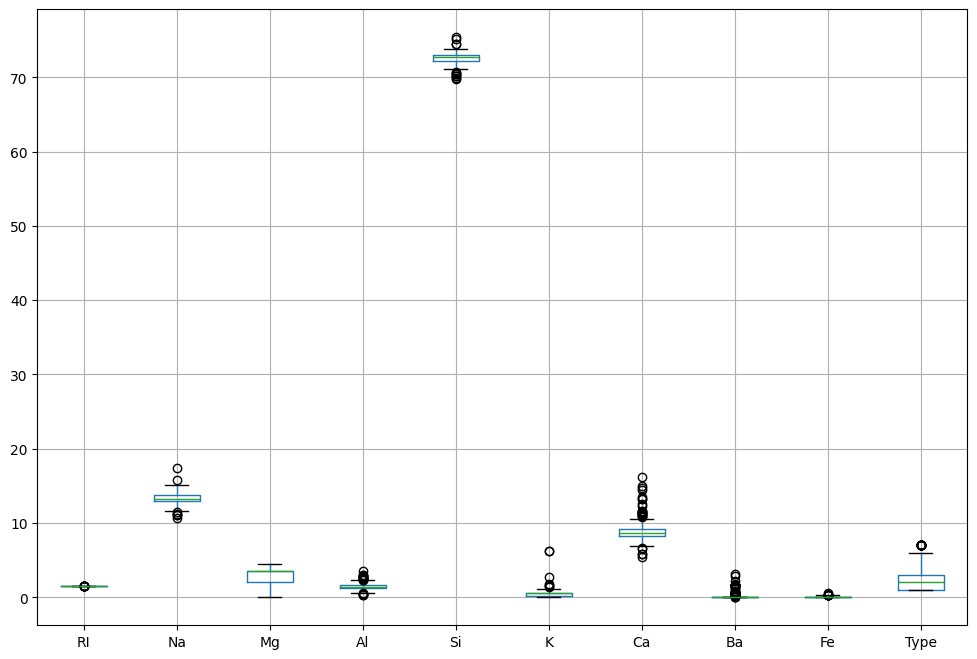

In [18]:
# outliers detected
df.boxplot(figsize=(12,8))
plt.show()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

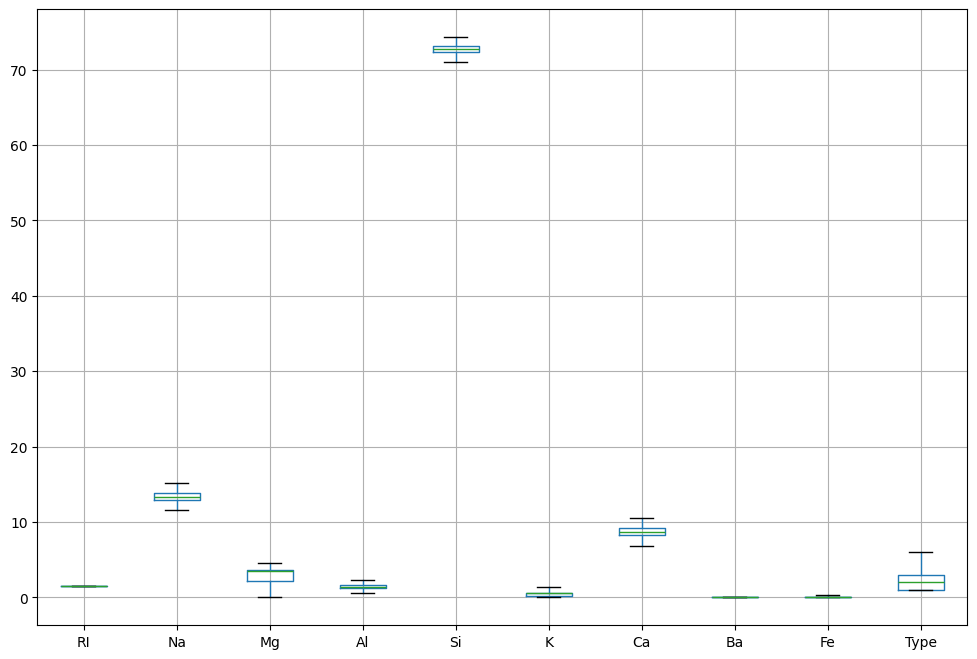

In [20]:
df.boxplot(figsize=(12,8))
plt.show()

In [22]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [21]:
X = df.drop(columns=["Type"])
y = df["Type"]

In [29]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [30]:
ord_enc=OrdinalEncoder()
df1=pd.DataFrame(ord_enc.fit_transform(df),columns=df.columns)

In [32]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,144.0,82.0,93.0,24.0,12.0,5.0,68.0,0.0,0.0,0.0
1,79.0,97.0,62.0,49.0,61.0,30.0,7.0,0.0,0.0,0.0
2,27.0,77.0,57.0,63.0,81.0,26.0,6.0,0.0,0.0,0.0
3,82.0,54.0,71.0,42.0,53.0,39.0,29.0,0.0,0.0,0.0
4,69.0,58.0,64.0,37.0,90.0,37.0,19.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209,28.0,107.0,0.0,102.0,53.0,7.0,92.0,0.0,0.0,4.0
210,52.0,130.0,0.0,90.0,88.0,0.0,42.0,0.0,0.0,4.0
211,140.0,116.0,0.0,92.0,110.0,0.0,46.0,0.0,0.0,4.0
212,37.0,118.0,0.0,88.0,116.0,0.0,47.0,0.0,0.0,4.0


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df1, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 10)
(43, 10)
(171,)
(43,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf_model.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [41]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [43]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[14  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  8]]


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Bagging and Boosting Methods